In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('fake_reg.csv')

In [3]:
data.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


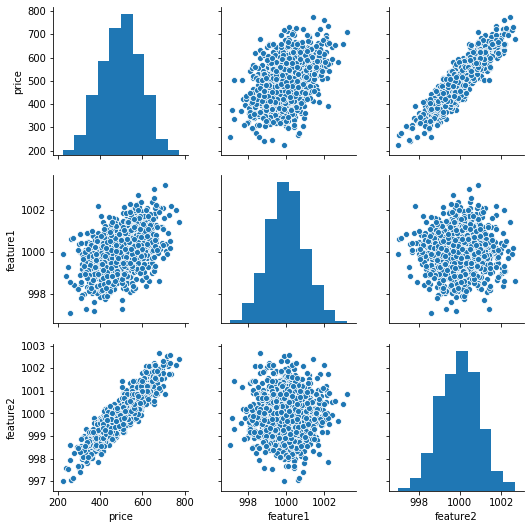

In [4]:
sns.pairplot(data)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = data[['feature1','feature2']].values
y = data['price'].values

In [7]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
X_test.shape

(300, 2)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
X_train = scaler.transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',
             loss='mse')

In [18]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 720us/step - loss: 255941.6719
Epoch 2/250
22/22 [==============================] - 0s 760us/step - loss: 255571.4062
Epoch 3/250
22/22 [==============================] - 0s 730us/step - loss: 255183.2969
Epoch 4/250
22/22 [==============================] - 0s 742us/step - loss: 254739.3125
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 254242.8594
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 253681.4844
Epoch 7/250
22/22 [==============================] - 0s 917us/step - loss: 253048.4844
Epoch 8/250
22/22 [==============================] - 0s 753us/step - loss: 252333.2500
Epoch 9/250
22/22 [==============================] - 0s 701us/step - loss: 251538.4844
Epoch 10/250
22/22 [==============================] - 0s 730us/step - loss: 250653.1875
Epoch 11/250
22/22 [==============================] - 0s 787us/step - loss: 249679.5469
Epoch 12/250
22/22 [=========================

22/22 [==============================] - 0s 700us/step - loss: 666.1851
Epoch 96/250
22/22 [==============================] - 0s 718us/step - loss: 636.5447
Epoch 97/250
22/22 [==============================] - 0s 736us/step - loss: 616.4799
Epoch 98/250
22/22 [==============================] - 0s 720us/step - loss: 590.0200
Epoch 99/250
22/22 [==============================] - 0s 625us/step - loss: 564.3633
Epoch 100/250
22/22 [==============================] - 0s 603us/step - loss: 539.7893
Epoch 101/250
22/22 [==============================] - 0s 648us/step - loss: 519.6051
Epoch 102/250
22/22 [==============================] - 0s 621us/step - loss: 496.1719
Epoch 103/250
22/22 [==============================] - 0s 633us/step - loss: 475.9863
Epoch 104/250
22/22 [==============================] - 0s 702us/step - loss: 455.8223
Epoch 105/250
22/22 [==============================] - 0s 661us/step - loss: 434.7645
Epoch 106/250
22/22 [==============================] - 0s 704us/step - l

22/22 [==============================] - 0s 678us/step - loss: 24.9081
Epoch 192/250
22/22 [==============================] - 0s 663us/step - loss: 24.4908
Epoch 193/250
22/22 [==============================] - 0s 703us/step - loss: 24.1297
Epoch 194/250
22/22 [==============================] - 0s 609us/step - loss: 24.3685
Epoch 195/250
22/22 [==============================] - 0s 656us/step - loss: 24.6485
Epoch 196/250
22/22 [==============================] - 0s 697us/step - loss: 24.6530
Epoch 197/250
22/22 [==============================] - 0s 640us/step - loss: 24.1222
Epoch 198/250
22/22 [==============================] - 0s 780us/step - loss: 24.4857
Epoch 199/250
22/22 [==============================] - 0s 758us/step - loss: 24.2810
Epoch 200/250
22/22 [==============================] - 0s 893us/step - loss: 24.3841
Epoch 201/250
22/22 [==============================] - 0s 736us/step - loss: 24.1435
Epoch 202/250
22/22 [==============================] - 0s 686us/step - loss: 24

In [19]:
loss_df = pd.DataFrame(model.history.history)

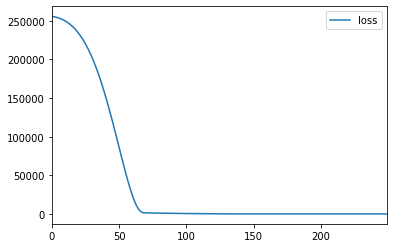

In [20]:
loss_df.plot()

In [21]:
model.evaluate(X_test,y_test,verbose=0)

25.483810424804688

In [22]:
model.evaluate(X_train,y_train,verbose=0)

25.08803367614746

In [23]:
test_predictions = model.predict(X_test)

In [24]:
test_pred = pd.Series(test_predictions.reshape(300,))
test_pred

0      404.527130
1      622.598022
2      591.208862
3      571.343140
4      365.917084
          ...    
295    528.194946
296    514.529907
297    608.718018
298    416.168060
299    410.120697
Length: 300, dtype: float32

In [25]:
y_pred = pd.DataFrame(y_test,columns=['org Y'])
y_pred

,org Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [26]:
y_pred = pd.concat([y_pred,test_pred],axis=1)


In [27]:
y_pred.columns = ['True T','model_predictions']

In [28]:
y_pred

,True T,model_predictions
0,402.296319,404.527130
1,624.156198,622.598022
2,582.455066,591.208862
3,578.588606,571.343140
4,371.224104,365.917084
...,...,...
295,525.704657,528.194946
296,502.909473,514.529907
297,612.727910,608.718018
298,417.569725,416.168060


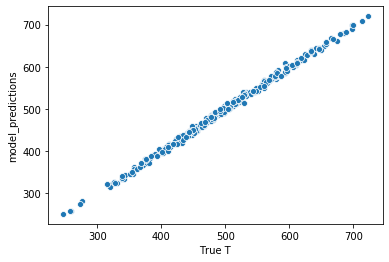

In [29]:
sns.scatterplot(x='True T',y='model_predictions',data=y_pred)

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
mean_absolute_error(y_pred['True T'],y_pred['model_predictions'])

4.042620430587359

In [32]:
mean_squared_error(y_pred['True T'],y_pred['model_predictions'])

25.483813374983487

In [33]:
new_gem = [[960,1000]]
new_gem = scaler.transform(new_gem)
model.predict(new_gem)

array([[15.545843]], dtype=float32)